# Building Logistic Regression Model for predicting Probability of Default (PD)

For further analytics, preprocessed datasests are saved as separate files, and from this step on, it is not required to run the whole project from scartch, but can go on with uploading the datasets that have been saved in the previous step. 



In [2]:
#import relevant libraries
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

part_1 = pd.read_csv('train_inputs_part_1.csv')
part_2 = pd.read_csv('train_inputs_part_2.csv')
part_3 = pd.read_csv('train_inputs_part_3.csv')
part_4 = pd.read_csv('train_inputs_part_4.csv')

train_inputs = pd.concat([part_1, part_2, part_3, part_4])

pd.options.display.max_rows = 50
pd.options.display.max_columns = None

train_targets = pd.read_csv('train_targets.csv')





In [3]:
shape = [train_inputs.shape, 
         train_targets.shape]
shape

[(347181, 301), (347181, 2)]

# Logistic Regression intuition 

In [4]:
# Based on the initial point of generating dummy variables, we know that the first dummy variable is grade_A
# The following code returns the column number of the first dummy variable in the train_inputs dataframe 

baseline_dummy = train_inputs.columns.get_loc("grade_A")

# This code returns the last column number
last_dummy = train_inputs.shape[1]-1



In [5]:
train_inputs

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_date,days_passed,month_passed,term_36,term_60,issue_d_date,months_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_status_Not Verified,verif_status_Source Verified,verif_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,home_own_none_other_any_combined,st_group_TX,st_group_FL,st_group_NY,st_group_CA,st_group_NM_MD_NC_LA_MD,st_group_MI_NJ_VA,st_group_OK_TN_AZ_DE_AR_UT,st_group_KY_MN_NA_IN_OH,st_group_RI_OR_GA_WA,st_group_SD_ID,st_group_MS_MT,st_group_IL_CT_CO,st_group_VT_SC,st_group_KS,term:36,term:60,months_factor,months_since_issued:106,months_since_issued:115,months_since_issued:124,months_since_issued:133,months_since_issued:142,months_since_issued:151,months_since_issued:160,months_since_issued:169,months_since_issued:178,months_since_issued:187,int_rate_classes,"int_rate_classes_(5.399, 7.484]","int_rate_classes_(7.484, 9.548]","int_rate_classes_(9.548, 11.612]","int_rate_classes_(11.612, 13.676]","int_rate_classes_(13.676, 15.74]","int_rate_classes_(15.74, 17.804]","int_rate_classes_(17.804, 19.868]","int_rate_classes_(19.868, 21.932]","int_rate_classes_(21.932, 23.996]","int_rate_classes_(23.996, 26.06

In [6]:
'''This code assigns a list of column names to the variable column_names, using the tolist() method to 
convert the Index object returned by the columns attribute to a list'''
dummy_vars = ["'" + name + "'," for name in train_inputs.iloc[:,baseline_dummy:last_dummy].columns]

# The output of the dummy_vars needs to have list of the column names starting from 'grade_A' all the way to funded_amount_(32970.588, 33985.294]
dummy_vars
len(dummy_vars)

#
with open('column-names.txt', 'w') as f:
    for name in dummy_vars:
        f.write(name + '\n')






In [7]:
dummy_vars

["'grade_A',",
 "'grade_B',",
 "'grade_C',",
 "'grade_D',",
 "'grade_E',",
 "'grade_F',",
 "'grade_G',",
 "'sub_grade_A1',",
 "'sub_grade_A2',",
 "'sub_grade_A3',",
 "'sub_grade_A4',",
 "'sub_grade_A5',",
 "'sub_grade_B1',",
 "'sub_grade_B2',",
 "'sub_grade_B3',",
 "'sub_grade_B4',",
 "'sub_grade_B5',",
 "'sub_grade_C1',",
 "'sub_grade_C2',",
 "'sub_grade_C3',",
 "'sub_grade_C4',",
 "'sub_grade_C5',",
 "'sub_grade_D1',",
 "'sub_grade_D2',",
 "'sub_grade_D3',",
 "'sub_grade_D4',",
 "'sub_grade_D5',",
 "'sub_grade_E1',",
 "'sub_grade_E2',",
 "'sub_grade_E3',",
 "'sub_grade_E4',",
 "'sub_grade_E5',",
 "'sub_grade_F1',",
 "'sub_grade_F2',",
 "'sub_grade_F3',",
 "'sub_grade_F4',",
 "'sub_grade_F5',",
 "'sub_grade_G1',",
 "'sub_grade_G2',",
 "'sub_grade_G3',",
 "'sub_grade_G4',",
 "'sub_grade_G5',",
 "'home_ownership_ANY',",
 "'home_ownership_MORTGAGE',",
 "'home_ownership_NONE',",
 "'home_ownership_OTHER',",
 "'home_ownership_OWN',",
 "'home_ownership_RENT',",
 "'verif_status_Not Verified',

## Dummy Variable Trap

The dummy variable trap is a common issue that can occur when creating dummy variables in regression analysis, where one or more of the dummy variables can be expressed as a linear combination of the others. This results in a perfect multicollinearity between the variables, which can lead to issues in interpreting the results of the regression analysis.
Consider the example of education level with three categories: "No Higher Education," "College Graduated," and "Earned Graduate Master or More."

To create dummy variables for these categories, we would typically create two binary variables: one for "College Graduated" and one for "Earned Graduate Master or More." However, this creates the potential for the dummy variable trap, as "No Higher Education" can be derived as 1 minus the sum of the other two variables.

To avoid the dummy variable trap, we would need to include all three dummy variables in the regression model, but leave one of them out as the reference category. For example, we could leave out the "No Higher Education" category and include two dummy variables: one for "College Graduated" and one for "Earned Graduate Master or More."

The interpretation of the coefficients for these variables would then be as follows:

The coefficient for "College Graduated" would represent the effect of having a college degree compared to having no higher education, holding constant the effect of having a graduate degree.
The coefficient for "Earned Graduate Master or More" would represent the effect of having a graduate degree compared to having no higher education, holding constant the effect of having a college degree.
The omitted category, "No Higher Education," would be the reference category, and the coefficients for the other two categories would be interpreted relative to this category.
By including all three dummy variables, we avoid the dummy variable trap and can obtain separate estimates of the effects of each category.

In [8]:
"""This step returns dummies_ref_categ dataframe with only dummy variables, and removes one variable from each class as a 
reference category to avoid dummy variable trap as discussed above"""

train_dummies = train_inputs.loc[:, ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'home_ownership_ANY',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OWN',
'home_ownership_RENT',
'verif_status_Not Verified',
'verif_status_Source Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_w',
'st_group_TX',
'st_group_FL',
'st_group_NY',
'st_group_CA',
'st_group_NM_MD_NC_LA_MD',
'st_group_MI_NJ_VA',
'st_group_KY_MN_NA_IN_OH',
'st_group_RI_OR_GA_WA',
'st_group_SD_ID',
'st_group_MS_MT',
'st_group_IL_CT_CO',
'st_group_VT_SC',
'st_group_KS',
'term:36',
'months_since_issued:115',
'months_since_issued:124',
'months_since_issued:133',
'months_since_issued:142',
'months_since_issued:151',
'months_since_issued:160',
'months_since_issued:169',
'months_since_issued:178',
'months_since_issued:187',
'int_rate_classes_(5.399, 7.484]',
'int_rate_classes_(7.484, 9.548]',
'int_rate_classes_(9.548, 11.612]',
'int_rate_classes_(11.612, 13.676]',
'int_rate_classes_(13.676, 15.74]',
'int_rate_classes_(15.74, 17.804]',
'int_rate_classes_(17.804, 19.868]',
'int_rate_classes_(19.868, 21.932]',
'int_rate_classes_(21.932, 23.996]',
'income_<0k',
'income_0k-10k',
'income_10k-20k',
'income_20k-30k',
'income_30k-40k',
'income_40k-50k',
'income_50k-60k',
'income_60k-70k',
'income_70k-80k',
'income_80k-90k',
'income_90k-100k',
'income_100k-110k',
'income_110k-120k',
'funded_amount_(465.5, 1514.706]',
'funded_amount_(1514.706, 2529.412]',
'funded_amount_(2529.412, 3544.118]',
'funded_amount_(3544.118, 4558.824]',
'funded_amount_(4558.824, 5573.529]',
'funded_amount_(5573.529, 6588.235]',
'funded_amount_(6588.235, 7602.941]',
'funded_amount_(7602.941, 8617.647]',
'funded_amount_(8617.647, 9632.353]',
'funded_amount_(9632.353, 10647.059]',
'funded_amount_(10647.059, 11661.765]',
'funded_amount_(11661.765, 12676.471]',
'funded_amount_(12676.471, 13691.176]',
'funded_amount_(13691.176, 14705.882]',
'funded_amount_(14705.882, 15720.588]',
'funded_amount_(15720.588, 16735.294]',
'funded_amount_(16735.294, 17750.0]',
'funded_amount_(17750.0, 18764.706]',
'funded_amount_(18764.706, 19779.412]',
'funded_amount_(19779.412, 20794.118]',
'funded_amount_(20794.118, 21808.824]',
'funded_amount_(21808.824, 22823.529]',
'funded_amount_(22823.529, 23838.235]',
'funded_amount_(23838.235, 24852.941]',
'funded_amount_(24852.941, 25867.647]',
'funded_amount_(25867.647, 26882.353]',
'funded_amount_(26882.353, 27897.059]',
'funded_amount_(27897.059, 28911.765]',
'funded_amount_(28911.765, 29926.471]',
'funded_amount_(29926.471, 30941.176]',
'funded_amount_(30941.176, 31955.882]',
'funded_amount_(31955.882, 32970.588]',
'funded_amount_(32970.588, 33985.294]',
]]

In [9]:
train_dummies.shape

(347181, 105)

In [10]:
ref_categories = ['grade_G',
                  'verif_status_Verified',
                  'purpose_other',
                  'home_own_none_other_any_combined',
                  'initial_list_status_f',
                  'st_group_OK_TN_AZ_DE_AR_UT',
                  'term:60',
                  'months_since_issued:106',
                  'int_rate_classes_(23.996, 26.06]',
                  'income_120k-130k',
                  'funded_amount_(33985.294, 35000.0]'
                  ]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
reg1 = LogisticRegression()
pd.options.display.max_rows = 10



In [13]:
train_targets

,Unnamed: 0,payment_quality
0,89831,0
1,160566,1
2,43087,1
3,121576,1
4,52758,1
...,...,...
347176,104874,1
347177,75689,0
347178,132949,0
347179,147970,1


In [14]:
reg1.fit(train_dummies,train_targets['payment_quality'])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
reg1.intercept_

array([1.45207366])

In [16]:
reg1.coef_

array([[ 0.34739504,  0.37916965,  0.22779548,  0.1457517 ,  0.11907034,
         0.08247336,  0.        ,  0.17249424,  0.14340003,  0.15339562,
         0.06410859,  0.05286606, -0.02340092,  0.18286071,  0.15382494,
         0.04484045, -0.14276733,  0.02947456,  0.03933473,  0.12230647,
        -0.09855266, -0.11628436, -0.15191934, -0.4071216 ,  0.03666586,
         0.34020196,  0.03586772,  0.09639983, -0.12831708, -0.06046938,
        -0.04785322, -0.03693888, -0.05914283, -0.01736528,  0.07375557,
         0.08380767,  0.20659902,  0.12252416,  0.21970963,  0.21512773,
        -0.05223481, -0.34312626, -0.62275724, -0.86706419, -0.91011628,
        -0.77402737, -0.60324007, -0.43658964, -0.54122067, -0.01020635,
         2.24639601,  1.67588019,  1.23115807,  0.99913318,  0.82375417,
         0.60572674,  0.43927111,  0.31156989,  0.13649389,  0.        ,
        -0.83721401, -0.93642188, -0.84684629, -0.77178855, -0.6186958 ,
        -0.5407826 , -0.40884724, -0.33411236, -0.2

In [17]:
var_names = train_dummies.columns.values
reg_table = pd.DataFrame(columns = ['Feature name'], data=var_names)
reg_table['Coefficients'] = np.transpose(reg1.coef_)
reg_table.index = reg_table.index + 1
reg_table.loc[0] = ["Intercept", reg1.intercept_[0]]
reg_table = reg_table.sort_index()
reg_table

,Feature name,Coefficients
0,Intercept,1.452074
1,grade_A,0.347395
2,grade_B,0.379170
3,grade_C,0.227795
4,grade_D,0.145752
...,...,...
101,"funded_amount_(28911.765, 29926.471]",-0.027767
102,"funded_amount_(29926.471, 30941.176]",0.045312
103,"funded_amount_(30941.176, 31955.882]",-0.028734
104,"funded_amount_(31955.882, 32970.588]",0.124958


In [18]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self, X, y):
        self.model.fit(X,y)
        denominator = (2.0* (1.0 + np.cosh(self.model.decision_function(X))))
        denominator = np.tile(denominator, (X.shape[1],1)).T
        F_ij = np.dot((X / denominator).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(X)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values 

In [19]:
y = train_targets['payment_quality']
y.shape

(347181,)

In [20]:
reg = LogisticRegression_p_values()
reg.fit(train_dummies,y)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinAlgError: Singular matrix

In [ ]:
print(train_dummies.T.shape) 
print(train_targets['payment_quality'].shape)
print(train_targets['payment_quality'].index)
print(train_dummies.index)

In [ ]:
import statsmodels.api as sm

x = train_dummies
y = train_targets['payment_quality']

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
x = sm.add_constant(x)



In [ ]:
print(x.shape,y.shape)
pd.options.display.max_rows = 50
pd.options.display.max_columns = 20
#y.head()
#x.head()


In [ ]:
import statsmodels.api as sm

# define L1 regularized logistic regression model
logit_model = sm.Logit(endog=y, exog=x)
result = logit_model.fit_regularized(method='l1', alpha=0.2, disp=0)

# print summary table with p-values
print(result.summary())


In [ ]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# rank of cols_to_keep is 8
print (np.linalg.matrix_rank(train_dummies.values))

train_cols = train_dummies.columns[1:]

#to check the rank of train_cols, which in this case is 8
print (np.linalg.matrix_rank(train_dummies.values))
x = train_dummies[train_cols]
y = train_targets['payment_quality']
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
#fit logit model
#logit = sm.Logit(train_targets['payment_quality'], train_dummies )
logit_model = sm.Logit(exog = x, endog = y)
#results = logit_model.fit_regularized(method='l1', alpha=0.2, disp=0)
#print(results.summary())
#print(logit_model.summary())
logit_model

In [ ]:
res = logit_model.fit()
print(logit_model.summary())

In [ ]:
# rank of cols_to_keep is 8
print(np.linalg.matrix_rank(train_dummies.values))
print(np.linalg.matrix_rank(train_targets['payment_quality']))

In [ ]:
import pandas as pd

# assuming x is a pandas DataFrame
corr_matrix = x.corr()

# create a copy of the correlation matrix without the diagonal
corr_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_no_diag.values, 0)

# sort the correlation matrix by absolute value and extract the top entries
top_corr = corr_no_diag.abs().stack().sort_values(ascending=False).reset_index()
top_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
top_corr = top_corr[top_corr['Feature 1'] < top_corr['Feature 2']]  # remove duplicates

# print the top correlated pairs
print(top_corr.head(10))


In [ ]:
from sklearn import linear_model
import scipy.stats as stat




In [ ]:
reg = LogisticRegression_p_values()
reg.fit(train_dummies, train_targets['payment_quality'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
        np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self


# Coefficient interpretations for Logistic Regression model

When all independent variables are dummy variables, the logistic regression model will output coefficients for each of the dummy variables. Each coefficient represents the change in the log odds of the dependent variable (i.e., the probability of default) associated with a one-unit increase in the corresponding independent variable, holding all other variables constant.

For example, suppose we have a dummy variable for whether the borrower is employed or not, where 0 represents unemployed and 1 represents employed. If the coefficient for this variable is 0.5, it means that being employed increases the log odds of defaulting on the loan by 0.5 units, holding all other variables constant.

To interpret the coefficients in a more academically rigorous manner, we can use the odds ratio, which is the exponentiated form of the coefficient. For example, if the odds ratio for the employment status variable is 1.6, it means that being employed increases the odds of defaulting on the loan by a factor of 1.6, holding all other variables constant. An odds ratio greater than 1 indicates that the independent variable is associated with an increased likelihood of default, while an odds ratio less than 1 indicates a decreased likelihood of default. A odds ratio of 1 indicates no association with default.

It's important to note that the coefficients and odds ratios are only meaningful when the independent variables are independent of each other and the model assumptions are met. It's also important to properly validate the model and test its predictive accuracy before using it to make decisions.



In [18]:
reg_table

,Feature name,Coefficients
0,Intercept,1.452074
1,grade_A,0.347395
2,grade_B,0.379170
3,grade_C,0.227795
4,grade_D,0.145752
...,...,...
101,"funded_amount_(28911.765, 29926.471]",-0.027767
102,"funded_amount_(29926.471, 30941.176]",0.045312
103,"funded_amount_(30941.176, 31955.882]",-0.028734
104,"funded_amount_(31955.882, 32970.588]",0.124958


# Model Validation

We start testing the model. The dataset we saved for testing is used in this step. As we discussed in the model building part of the project, the reference categories are removed to avoid dummy variable trap.


In [19]:
test_inputs = pd.read_csv('test_inputs.csv')
test_targets = pd.read_csv('test_targets.csv')

In [20]:
test_dummies = test_inputs.loc[:, ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'home_ownership_ANY',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OWN',
'home_ownership_RENT',
'verif_status_Not Verified',
'verif_status_Source Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_w',
'st_group_TX',
'st_group_FL',
'st_group_NY',
'st_group_CA',
'st_group_NM_MD_NC_LA_MD',
'st_group_MI_NJ_VA',
'st_group_KY_MN_NA_IN_OH',
'st_group_RI_OR_GA_WA',
'st_group_SD_ID',
'st_group_MS_MT',
'st_group_IL_CT_CO',
'st_group_VT_SC',
'st_group_KS',
'term:36',
'months_since_issued:115',
'months_since_issued:124',
'months_since_issued:133',
'months_since_issued:142',
'months_since_issued:151',
'months_since_issued:160',
'months_since_issued:169',
'months_since_issued:178',
'months_since_issued:187',
'int_rate_classes_(5.399, 7.484]',
'int_rate_classes_(7.484, 9.548]',
'int_rate_classes_(9.548, 11.612]',
'int_rate_classes_(11.612, 13.676]',
'int_rate_classes_(13.676, 15.74]',
'int_rate_classes_(15.74, 17.804]',
'int_rate_classes_(17.804, 19.868]',
'int_rate_classes_(19.868, 21.932]',
'int_rate_classes_(21.932, 23.996]',
'income_<0k',
'income_0k-10k',
'income_10k-20k',
'income_20k-30k',
'income_30k-40k',
'income_40k-50k',
'income_50k-60k',
'income_60k-70k',
'income_70k-80k',
'income_80k-90k',
'income_90k-100k',
'income_100k-110k',
'income_110k-120k',
'funded_amount_(465.5, 1514.706]',
'funded_amount_(1514.706, 2529.412]',
'funded_amount_(2529.412, 3544.118]',
'funded_amount_(3544.118, 4558.824]',
'funded_amount_(4558.824, 5573.529]',
'funded_amount_(5573.529, 6588.235]',
'funded_amount_(6588.235, 7602.941]',
'funded_amount_(7602.941, 8617.647]',
'funded_amount_(8617.647, 9632.353]',
'funded_amount_(9632.353, 10647.059]',
'funded_amount_(10647.059, 11661.765]',
'funded_amount_(11661.765, 12676.471]',
'funded_amount_(12676.471, 13691.176]',
'funded_amount_(13691.176, 14705.882]',
'funded_amount_(14705.882, 15720.588]',
'funded_amount_(15720.588, 16735.294]',
'funded_amount_(16735.294, 17750.0]',
'funded_amount_(17750.0, 18764.706]',
'funded_amount_(18764.706, 19779.412]',
'funded_amount_(19779.412, 20794.118]',
'funded_amount_(20794.118, 21808.824]',
'funded_amount_(21808.824, 22823.529]',
'funded_amount_(22823.529, 23838.235]',
'funded_amount_(23838.235, 24852.941]',
'funded_amount_(24852.941, 25867.647]',
'funded_amount_(25867.647, 26882.353]',
'funded_amount_(26882.353, 27897.059]',
'funded_amount_(27897.059, 28911.765]',
'funded_amount_(28911.765, 29926.471]',
'funded_amount_(29926.471, 30941.176]',
'funded_amount_(30941.176, 31955.882]',
'funded_amount_(31955.882, 32970.588]',
'funded_amount_(32970.588, 33985.294]',
]]

In [21]:
test_dummies

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verif_status_Not Verified,verif_status_Source Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,st_group_TX,st_group_FL,st_group_NY,st_group_CA,st_group_NM_MD_NC_LA_MD,st_group_MI_NJ_VA,st_group_KY_MN_NA_IN_OH,st_group_RI_OR_GA_WA,st_group_SD_ID,st_group_MS_MT,st_group_IL_CT_CO,st_group_VT_SC,st_group_KS,term:36,months_since_issued:115,months_since_issued:124,months_since_issued:133,months_since_issued:142,months_since_issued:151,months_since_issued:160,months_since_issued:169,months_since_issued:178,months_since_issued:187,"int_rate_classes_(5.399, 7.484]","int_rate_classes_(7.484, 9.548]","int_rate_classes_(9.548, 11.612]","int_rate_classes_(11.612, 13.676]","int_rate_classes_(13.676, 15.74]","int_rate_classes_(15.74, 17.804]","int_rate_classes_(17.804, 19.868]","int_rate_classes_(19.868, 21.932]","int_rate_classes_(21.932, 23.996]",income_<0k,income_0k-10k,income_10k-20k,income_20k-30k,income_30k-40k,income_40k-50k,income_50k-60k,income_60k-70k,income_70k-80k,income_80k-90k,income_90k-100k,income_100k-110k,income_110k-120k,"funded_amount_(465.5, 1514.706]","funded_amount_(1514.706, 2529.412]","funded_amount_(2529.412, 3544.118]","funded_amount_(3544.118, 4558.824]","funded_amount_(4558.824, 5573.529]","funded_amount_(5573.529, 6588.235]","funded_amount_(6588.235, 7602.941]","funded_amount_(7602.941, 8617.647]","funded_amount_(8617.647, 9632.353]","funded_amount_(9632.353, 10647.059]","funded_amount_(10647.059, 11661.765]","funded_amount_(11661.765, 12676.471]","funded_amount_(12676.471, 13691.176]","funded_amount_(13691.176, 14705.882]","funded_amount_(14705.882, 15720.588]","funded_amount_(15720.588, 16735.294]","funded_amount_(16735.294, 17750.0]","funded_amount_(17750.0, 18764.706]","funded_amount_(18764.706, 19779.412]","funded_amount_(19779.412, 20794.118]","funded_amount_(20794.118, 21808.824]","funded_amount_(21808.824, 22823.529]","funded_amount_(22823.529, 23838.235]","funded_amount_(23838.235, 24852.941]","funded_amount_(24852.941, 25867.647]","funded_amount_(25867.647, 26882.353]","funded_amount_(26882.353, 27897.059]","funded_amount_(27897.059, 28911.765]","funded_amount_(28911.765, 29926.471]","funded_amount_(29926.471, 30941.176]","funded_amount_(30941.176, 31955.882]","funded_amount_(31955.882, 32970.588]","funded_amount_(32970.588, 33985.294]"
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [36]:
bin_predicted_test = reg1.predict(test_dummies)
cont_predicted_test = reg1.predict_proba(test_dummies)


In [39]:
cont_predicted_test

array([[0.15143869, 0.84856131],
       [0.08471103, 0.91528897],
       [0.10211576, 0.89788424],
       ...,
       [0.13141138, 0.86858862],
       [0.05631581, 0.94368419],
       [0.1662822 , 0.8337178 ]])

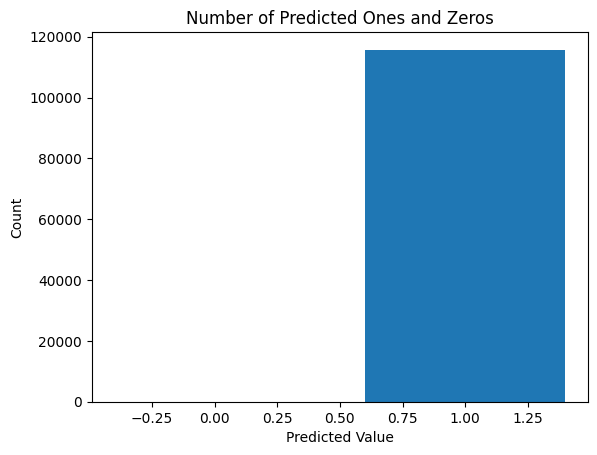

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted labels
predicted_labels = bin_predicted_test

# Count number of predicted ones and zeros
unique, counts = np.unique(predicted_labels, return_counts=True)
counts_dict = dict(zip(unique, counts))

# Create bar graph of predicted ones and zeros
plt.bar(counts_dict.keys(), counts_dict.values())

# Add axis labels and title
plt.xlabel('Predicted Value')
plt.ylabel('Count')
plt.title('Number of Predicted Ones and Zeros')

# Show the plot
plt.show()



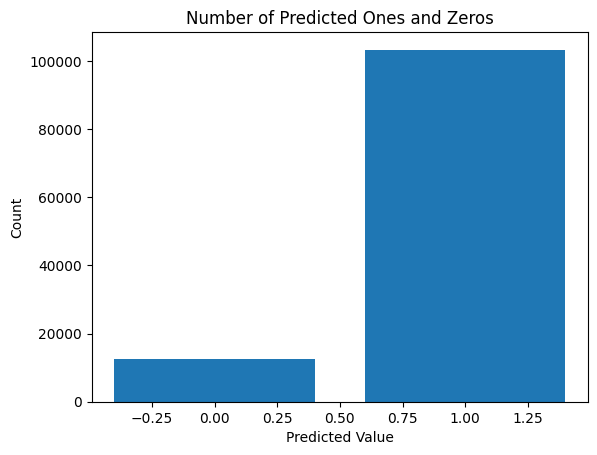

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted labels
predicted_labels = test_targets['payment_quality']

# Count number of predicted ones and zeros
unique, counts = np.unique(predicted_labels, return_counts=True)
counts_dict = dict(zip(unique, counts))

# Create bar graph of predicted ones and zeros
plt.bar(counts_dict.keys(), counts_dict.values())

# Add axis labels and title
plt.xlabel('Predicted Value')
plt.ylabel('Count')
plt.title('Number of Predicted Ones and Zeros')

# Show the plot
plt.show()


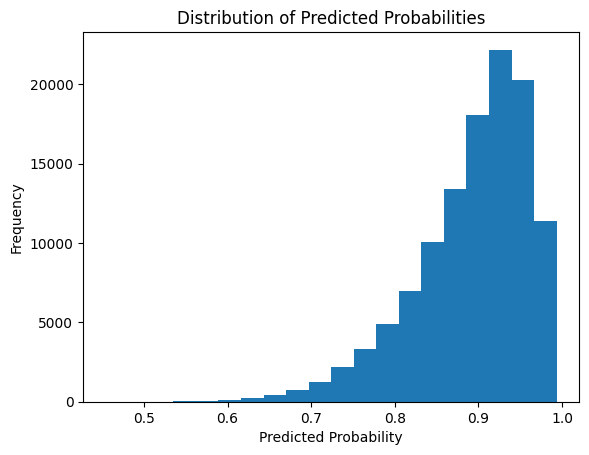

In [42]:
import matplotlib.pyplot as plt

# Get predicted probabilities
predicted_probs = reg1.predict_proba(test_dummies)[:, 1]

# Create histogram of predicted probabilities
plt.hist(predicted_probs, bins=20)

# Add axis labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')

# Show the plot
plt.show()


In [51]:
# merge the predicted probabilities and actual values
cont_predicted_test = pd.DataFrame(cont_predicted_test)
predicted_probs = reg1.predict_proba(test_dummies)[:, 1]
conf_table =  pd.concat([test_targets['payment_quality'], pd.DataFrame(predicted_probs)], axis=1)

In [52]:
conf_table

,payment_quality,0
0,1,0.848561
1,1,0.915289
2,0,0.897884
3,1,0.830880
4,1,0.966721
...,...,...
115723,1,0.935673
115724,0,0.896400
115725,1,0.868589
115726,1,0.943684
